## Descrieti un plan pentru constructia unui predictor pentru coloana label.

## 1. Importare baza de date
Cu acest set de date, vom construi un model de clasificare binară care va lua intrările de mai sus ca caracteristici și va prezice dacă clientul va castiga mai mult de 50k sau nu. În cele din urmă, ne vom evalua modelul folosind Logistic regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore');

df = pd.read_csv("data_train.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K


## 2. Analiza datelor 
O explorare inițială a setului de date precum găsirea numărului de înregistrări, numărul persoanelor care fac mai mult sau mai puțin de 50k etc, ne va arăta câți indivizi se potrivesc în fiecare grup.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 16 columns):
Unnamed: 0        29304 non-null int64
age               29304 non-null int64
workclass         29304 non-null object
fnlwgt            29304 non-null int64
education         29304 non-null object
education-num     29304 non-null int64
marital-status    29304 non-null object
occupation        29304 non-null object
relationship      29304 non-null object
race              29304 non-null object
sex               29304 non-null object
capital-gain      29304 non-null int64
capital-loss      29304 non-null int64
hours-per-week    29304 non-null int64
native-country    29304 non-null object
label             29304 non-null object
dtypes: int64(7), object(9)
memory usage: 3.6+ MB


In [4]:
df.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

Se observa din ultimile doua rezulate ca variabilele noastre nu au valori lipse, deoarece avem zero peste tot

In [5]:
nr_inregistrari=df.shape[0]              #Numarul total de inregistrari
nr_mare_50k=df[df['label']=='>50k'].shape[0]     #Numarul de persoane care castiga mai mult de 50k
nr_mic_50k=df[df['label']=='<=50k'].shape[0]     #Numarul de persoane care castiga mai putin de 50k
procent_mare_50k=(nr_mare_50k/nr_inregistrari)*100     #Procentul persoanelor care castiga mai mult de 50k

nr_inregistrari, nr_mare_50k,nr_mic_50k,procent_mare_50k


(29304, 0, 0, 0.0)

## 3. Vizualizarea si explorarea variabilei dependente 'label'

In [6]:
df['label'].value_counts()   

 <=50K    22289
 >50K      7015
Name: label, dtype: int64

Se observa ca avem un numar de 22289 persoane cu un venit mai mic decat 50k si un numar de 7015 de persoane cu un venit mai mare de 50k 

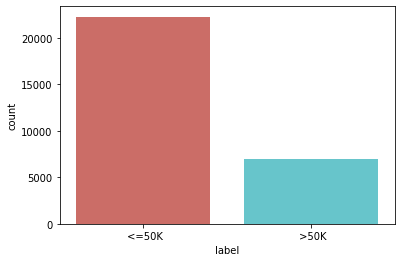

In [7]:
sns.countplot(x='label',data=df,palette='hls')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF5476A1C8>,
      dtype=object)

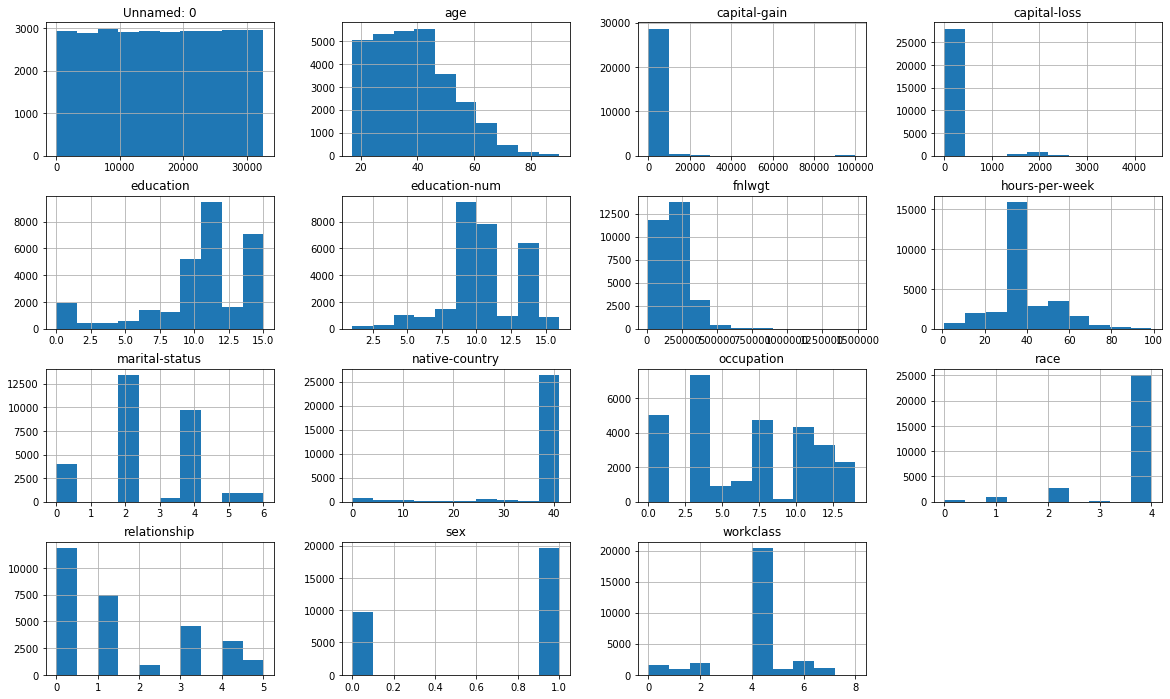

In [74]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 12
df[['Unnamed: 0','age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']].hist()

## 2. Convertirea numerica a coloanelor 

In [9]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label             object
dtype: object

Se observa ca nu toate variabilele noastre au valori numerice. Variabilele care nu sunt numerice sunt evidentiate cu "object".

Scopul nostru va fi ca toate coloanele din tabel sa fie cu valori numerice.

In [10]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['workclass'] = labelEncoder.fit_transform(df['workclass'])
df['education'] = labelEncoder.fit_transform(df['education'])
df['marital-status'] = labelEncoder.fit_transform(df['marital-status'])
df['occupation'] = labelEncoder.fit_transform(df['occupation'])
df['relationship'] = labelEncoder.fit_transform(df['relationship'])
df['race'] = labelEncoder.fit_transform(df['race'])
df['sex'] = labelEncoder.fit_transform(df['sex'])
df['native-country'] = labelEncoder.fit_transform(df['native-country'])
df['label']= labelEncoder.fit_transform(df['label'])

df['workclass'],df['education'],df['marital-status'],df['occupation'],df['relationship'],df['race'],df['sex'],df['native-country'],df['label']

(0        2
 1        4
 2        7
 3        6
 4        7
         ..
 29299    4
 29300    1
 29301    4
 29302    0
 29303    4
 Name: workclass, Length: 29304, dtype: int32, 0        13
 1        11
 2        11
 3        15
 4        11
          ..
 29299    11
 29300    12
 29301     9
 29302    15
 29303    11
 Name: education, Length: 29304, dtype: int32, 0        4
 1        4
 2        4
 3        2
 4        2
         ..
 29299    4
 29300    4
 29301    2
 29302    2
 29303    2
 Name: marital-status, Length: 29304, dtype: int32, 0         1
 1        12
 2        11
 3        12
 4        11
          ..
 29299     9
 29300     4
 29301    12
 29302     0
 29303     3
 Name: occupation, Length: 29304, dtype: int32, 0        3
 1        3
 2        1
 3        0
 4        0
         ..
 29299    2
 29300    3
 29301    5
 29302    0
 29303    0
 Name: relationship, Length: 29304, dtype: int32, 0        2
 1        3
 2        4
 3        4
 4        4
         ..
 29299 

In [11]:
#verificarea:
df.dtypes

Unnamed: 0        int64
age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
label             int32
dtype: object

Se observa ca toate caracteristicile noastre sunt numerice si ne va fi mai usor sa facem predictia

In [12]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,2,144182,13,1,4,1,3,2,0,0,0,25,39,0
1,19102,20,4,100605,11,9,4,12,3,3,1,0,0,40,33,0
2,16791,26,7,152457,11,9,4,11,1,4,1,0,0,40,39,0
3,2832,57,6,353808,15,10,2,12,0,4,1,0,0,60,39,1
4,8228,48,7,122086,11,9,2,11,0,4,1,0,0,40,39,0


## 3. Impartirea datelor in variabile dependente si independente

Y reprezinta variabila depedenta 

X reprezinta setul de variabile independente

In [51]:
X=df[['Unnamed: 0','age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]
Y=df['label']
X,Y

(       Unnamed: 0  age  workclass  fnlwgt  education  education-num  \
 0           27239   34          2  144182         13              1   
 1           19102   20          4  100605         11              9   
 2           16791   26          7  152457         11              9   
 3            2832   57          6  353808         15             10   
 4            8228   48          7  122086         11              9   
 ...           ...  ...        ...     ...        ...            ...   
 29299       19268   18          4   59202         11              9   
 29300       11724   37          1  194630         12             14   
 29301       15729   29          4  122112          9             13   
 29302        3231   52          0  134447         15             10   
 29303        8900   24          4  172612         11              9   
 
        marital-status  occupation  relationship  race  sex  capital-gain  \
 0                   4           1             3     2   

## 5.  Modelul de Regresie Logistica

In [58]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
X_train ,X_test, Y_train, Y_test

(       Unnamed: 0  age  workclass  fnlwgt  education  education-num  \
 348         19273   18          4  308889          1              7   
 2157         1094   21          4  163870         15             10   
 17882       17568   52          4  126978         11              9   
 10084       25981   63          4  196725         11              9   
 24129       10778   24          4  142022         15             10   
 ...           ...  ...        ...     ...        ...            ...   
 13123        3805   19          0  423863         15             10   
 19648       10284   63          1   95680         15             10   
 9845        14473   53          2  233722          7             12   
 10799         294   27          4  248402          9             13   
 2732         6349   50          2  145166         12             14   
 
        marital-status  occupation  relationship  race  sex  capital-gain  \
 348                 4           1             2     1   

In [54]:
from sklearn.linear_model import LogisticRegression
# crearea de instante 
logistic_model=LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 6. Predictia 

Acum că ne-am pregătit algoritmul, este timpul să facem niște predicții. Pentru a face acest lucru, vom folosi datele noastre de testare și vom vedea cât de exact prezice algoritmul nostru in ceea ce priveste castigul unui venit de peste 50k sau nu. Pentru a face predicții cu privire la datele de testare, executați următorul script:

In [60]:
Y_predictie=logistic_model.predict(X_test)
Y_predictie

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
import numpy as np
Y_test = np.array(list(Y_test))
Y_pred = np.array(Y_predictie)

df_predictie = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predictie.flatten()})
df_predictie.head(5)


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


## 7. Evaluarea modelului de regresie logistic folosind 'Confusion Matrix'

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
Y_predictie=logistic_model.predict(X_test)
confusion_matrix=confusion_matrix(Y_test,Y_predictie)
confusion_matrix


array([[4287,  208],
       [ 955,  411]], dtype=int64)

Aici avem urmatoarele valori observate:

### True Positive = 4287

### False Positive = 955

### False Negative = 208

### True Negative = 411

Aici, puteți vedea Confusion Matrix sub forma obiectului tablou. Dimensiunea acestei matrice este 2 x 2 deoarece acest model este o clasificare binară. Aveți două clase 0 și 1.

Valorile diagonale reprezintă predicții exacte, în timp ce elementele care nu sunt diagonale sunt predicții inexacte.

În rezultat, 4287 și 411 sunt predicții reale, iar 955 și 208 sunt previziuni incorecte.

In [64]:
print(classification_report(Y_test, Y_predictie))  
print(accuracy_score(Y_test, Y_predictie))   # acuratetia 

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4495
           1       0.66      0.30      0.41      1366

    accuracy                           0.80      5861
   macro avg       0.74      0.63      0.65      5861
weighted avg       0.78      0.80      0.77      5861

0.8015696980037537


## 7. Vizualizarea 'Confusion Matrix'

Text(0.5, 257.44, 'Predicted label')

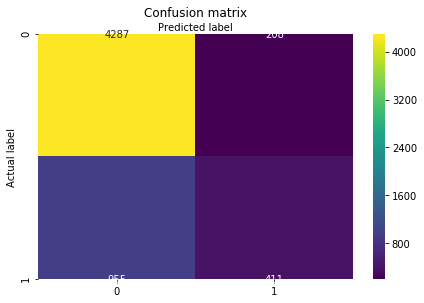

In [71]:
fig, ax = plt.subplots()
tick_marks = np.arange(len('label'))
plt.xticks(tick_marks, 'label')
plt.yticks(tick_marks, 'label')
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')